In [116]:
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.ribes_score import corpus_ribes
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.stem.porter import *
from nltk.corpus import stopwords

nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [117]:
import string
import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec

from sklearn.manifold import TSNE

import pandas as pd
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show,figure
%matplotlib inline

import numpy as np

In [118]:
wikiDatas = ['https://en.wikipedia.org/wiki/Python_(programming_language)',
       'https://en.wikipedia.org/wiki/Java_(programming_language)',
       'https://en.wikipedia.org/wiki/C_Sharp_(programming_language)',
       'https://en.wikipedia.org/wiki/C%2B%2B',
       'https://en.wikipedia.org/wiki/C_(programming_language)',
       'https://en.wikipedia.org/wiki/Assembly_language',
       'https://en.wikipedia.org/wiki/Machine_code',
       'https://en.wikipedia.org/wiki/JavaScript',
       'https://en.wikipedia.org/wiki/PHP',
       'https://en.wikipedia.org/wiki/Programming_language',
       'https://en.wikipedia.org/wiki/Delphi_(software)',
       'https://en.wikipedia.org/wiki/HTML',
       'https://en.wikipedia.org/wiki/Unified_Modeling_Language',
       'https://en.wikipedia.org/wiki/Ruby_(programming_language)',
       'https://en.wikipedia.org/wiki/Objective-C',
       'https://en.wikipedia.org/wiki/Swift_(programming_language)',
       'https://en.wikipedia.org/wiki/Visual_Basic_(classic)',
       'https://en.wikipedia.org/wiki/SQL',
       'https://en.wikipedia.org/wiki/Deep_learning',
       'https://en.wikipedia.org/wiki/Convolutional_neural_network',
       'https://en.wikipedia.org/wiki/LeNet',
       'https://en.wikipedia.org/wiki/AlexNet',
       'https://en.wikipedia.org/wiki/Artificial_neural_network',
       'https://en.wikipedia.org/wiki/Computer_vision',
       'https://en.wikipedia.org/wiki/Speech_recognition',
       'https://en.wikipedia.org/wiki/Natural_language_processing',
       'https://en.wikipedia.org/wiki/Convolution',
       'https://en.wikipedia.org/wiki/Hyperbolic_functions',
       'https://en.wikipedia.org/wiki/Sigmoid_function',
       'https://en.wikipedia.org/wiki/Rectifier_(neural_networks)',
       'https://en.wikipedia.org/wiki/Softmax_function',
       'https://en.wikipedia.org/wiki/Big_data',
       'https://en.wikipedia.org/wiki/Artificial_intelligence',
       'https://en.wikipedia.org/wiki/Data_structure',
       'https://en.wikipedia.org/wiki/Array_data_structure',
       'https://en.wikipedia.org/wiki/Record_(computer_science)',
       'https://en.wikipedia.org/wiki/Linked_list',
       'https://en.wikipedia.org/wiki/Stack_(abstract_data_type)',
       'https://en.wikipedia.org/wiki/Queue_(abstract_data_type)',
       'https://en.wikipedia.org/wiki/Tree_(data_structure)',
       'https://en.wikipedia.org/wiki/Graph_(abstract_data_type)',
       'https://en.wikipedia.org/wiki/Heap_(data_structure)',
       'https://en.wikipedia.org/wiki/Hash_function',
       'https://en.wikipedia.org/wiki/Wiki',
       'https://en.wikipedia.org/wiki/Wikipedia',
       'https://en.wikipedia.org/wiki/Wiki_software',
       'https://en.wikipedia.org/wiki/Web_2.0',
       'https://en.wikipedia.org/wiki/Twitter',
       'https://en.wikipedia.org/wiki/Facebook',
       'https://en.wikipedia.org/wiki/YouTube',
       'https://en.wikipedia.org/wiki/Plurk',
       'https://en.wikipedia.org/wiki/Google',
       'https://en.wikipedia.org/wiki/Microsoft',
       'https://en.wikipedia.org/wiki/Apple_Inc.',
       'https://en.wikipedia.org/wiki/Tesla,_Inc.',
       'https://en.wikipedia.org/wiki/Amazon_(company)',
       'https://en.wikipedia.org/wiki/Alan_Turing',
       'https://en.wikipedia.org/wiki/Nikola_Tesla',
       'https://en.wikipedia.org/wiki/Bill_Gates',
       'https://en.wikipedia.org/wiki/Steve_Jobs',
       'https://en.wikipedia.org/wiki/Elon_Musk',
       'https://en.wikipedia.org/wiki/Jeff_Bezos',
       'https://en.wikipedia.org/wiki/Mark_Zuckerberg',
       'https://en.wikipedia.org/wiki/Microsoft_Windows',
       'https://en.wikipedia.org/wiki/Linux',
       'https://en.wikipedia.org/wiki/MacOS',
       'https://en.wikipedia.org/wiki/Android_(operating_system)',
       'https://en.wikipedia.org/wiki/IOS',
       'https://en.wikipedia.org/wiki/Algorithm',
       'https://en.wikipedia.org/wiki/Divide-and-conquer_algorithm',
       'https://en.wikipedia.org/wiki/Dynamic_programming',
       'https://en.wikipedia.org/wiki/Greedy_algorithm',
       'https://en.wikipedia.org/wiki/Linear_programming',
       'https://en.wikipedia.org/wiki/Recursion',
       'https://en.wikipedia.org/wiki/Fractal',
       'https://en.wikipedia.org/wiki/Iteration',
       'https://en.wikipedia.org/wiki/Time_complexity',
       'https://en.wikipedia.org/wiki/Space_complexity',
       'https://en.wikipedia.org/wiki/NP_(complexity)',
       'https://en.wikipedia.org/wiki/Breadth-first_search',
       'https://en.wikipedia.org/wiki/Depth-first_search',
       'https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm',
       'https://en.wikipedia.org/wiki/A*_search_algorithm',
       'https://en.wikipedia.org/wiki/Iterative_deepening_depth-first_search',
       'https://en.wikipedia.org/wiki/Bidirectional_search',
       'https://en.wikipedia.org/wiki/Bubble_sort',
       'https://en.wikipedia.org/wiki/Selection_sort',
       'https://en.wikipedia.org/wiki/Insertion_sort',
       'https://en.wikipedia.org/wiki/Quicksort',
       'https://en.wikipedia.org/wiki/Merge_sort',
       'https://en.wikipedia.org/wiki/Heapsort',
       'https://en.wikipedia.org/wiki/Calculus',
       'https://en.wikipedia.org/wiki/Linear_algebra',
       'https://en.wikipedia.org/wiki/Set_theory',
       'https://en.wikipedia.org/wiki/Discrete_mathematics',
       'https://en.wikipedia.org/wiki/Probability_theory',
       'https://en.wikipedia.org/wiki/Engineering_mathematics',
       'https://en.wikipedia.org/wiki/Compiler',
       'https://en.wikipedia.org/wiki/Interpreter_(computing)',
       'https://en.wikipedia.org/wiki/Software_engineering',
       'https://en.wikipedia.org/wiki/Computer',
       'https://en.wikipedia.org/wiki/Personal_computer',
       'https://en.wikipedia.org/wiki/Supercomputer',
       'https://en.wikipedia.org/wiki/Microprocessor',
       'https://en.wikipedia.org/wiki/Computer_hardware',
       'https://en.wikipedia.org/wiki/Software',
       'https://en.wikipedia.org/wiki/Internet_protocol_suite',
       'https://en.wikipedia.org/wiki/World_Wide_Web',
       'https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol',
       'https://en.wikipedia.org/wiki/File_Transfer_Protocol',
       'https://en.wikipedia.org/wiki/Domain_Name_System',
       'https://en.wikipedia.org/wiki/Dynamic_Host_Configuration_Protocol',
       'https://en.wikipedia.org/wiki/Secure_Shell',
       'https://en.wikipedia.org/wiki/Simple_Mail_Transfer_Protocol',
       'https://en.wikipedia.org/wiki/Post_Office_Protocol',
       'https://en.wikipedia.org/wiki/Transmission_Control_Protocol',
       'https://en.wikipedia.org/wiki/User_Datagram_Protocol',
       'https://en.wikipedia.org/wiki/Internet_Protocol',
       'https://en.wikipedia.org/wiki/IPv4',
       'https://en.wikipedia.org/wiki/IPv6',
       'https://en.wikipedia.org/wiki/Medium_access_control',
       'https://en.wikipedia.org/wiki/OSI_model',
       'https://en.wikipedia.org/wiki/Wi-Fi',
       'https://en.wikipedia.org/wiki/Ethernet',
       'https://en.wikipedia.org/wiki/Bluetooth',
       'https://en.wikipedia.org/wiki/Zigbee',
       'https://en.wikipedia.org/wiki/Near-field_communication',
       'https://en.wikipedia.org/wiki/Radio-frequency_identification',
       'https://en.wikipedia.org/wiki/Programmer']

In [119]:
import requests
from bs4 import BeautifulSoup

word = []
for wikiData in wikiDatas:
  r = requests.get(wikiData) #將網頁資料GET下來
  soup = BeautifulSoup(r.text,"html.parser") #將網頁資料以html.parser
  sel = soup.select("div.mw-parser-output p") #取HTML標中的 <div class="mw-parser-output"></div> 中的<p>標籤存入sel
  for s in sel:
      word.append(s.text)

word = "".join(word)

In [120]:
len(word)

3841471

In [121]:
gberg_sent_tokens = sent_tokenize(word)

In [122]:
gberg_sent_tokens[1]

'Its design philosophy emphasizes code readability with its use of significant indentation.'

In [123]:
len(gberg_sent_tokens)

25924

In [124]:
gbrg_sents = []
for gberg_sent_token in gberg_sent_tokens:
  gbrg_sents.append(word_tokenize(gberg_sent_token))

In [125]:
stpwrds = stopwords.words('english')+list(string.punctuation)

In [126]:
#stpwrds

In [127]:
[w.lower() for w in gbrg_sents[4] if w not in stpwrds]

['it',
 'supports',
 'multiple',
 'programming',
 'paradigms',
 'including',
 'structured',
 'particularly',
 'procedural',
 'object-oriented',
 'functional',
 'programming']

In [128]:
stemmer = PorterStemmer()

In [129]:
[stemmer.stem(w.lower()) for w in gbrg_sents[4] if w not in stpwrds]

['it',
 'support',
 'multipl',
 'program',
 'paradigm',
 'includ',
 'structur',
 'particularli',
 'procedur',
 'object-ori',
 'function',
 'program']

In [130]:
phraes = Phrases(gbrg_sents)

In [131]:
bigram = Phraser(phraes)

In [132]:
#bigram.phrasegrams

In [133]:
lower_sents = []
for gs in gbrg_sents:
  lower_sents.append([stemmer.stem(w.lower()) for w in gs if w not in list(string.punctuation)])

In [134]:
lower_bigram = Phraser(Phrases(lower_sents))

In [135]:
clean_sents = []
for s in lower_sents:
  clean_sents.append(lower_bigram[s])

In [136]:
model = Word2Vec(sentences=clean_sents,size=64,
          sg=1,window=10,iter=10,min_count=5,workers=4)

In [137]:
len(model.wv.vocab)

8448

In [152]:
model.wv.most_similar('python')

[('perl', 0.7803364396095276),
 ('c_c++', 0.7189080715179443),
 ('c++', 0.7142698764801025),
 ('java', 0.7116744518280029),
 ('script_languag', 0.7073963284492493),
 ('matlab', 0.7071568965911865),
 ('javascript', 0.7015472054481506),
 ('lisp', 0.6901494264602661),
 ('cobol', 0.676724910736084),
 ('php', 0.6705166101455688)]

In [148]:
model.wv.doesnt_match('javascript is java'.split())

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'is'

In [160]:
model.wv.similarity('cat','dog')

0.7271197

In [138]:
tsne = TSNE(n_components=2, n_iter=1000)
X_2d = tsne.fit_transform(model.wv[model.wv.vocab])
cootds_df = pd.DataFrame(X_2d, columns=['x','y'])
cootds_df['token'] = model.wv.vocab.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [139]:
cootds_df.head()

,x,y,token
0,-14.721118,-51.363445,python
1,-36.711937,11.884418,is
2,-10.248913,-9.897618,an
3,-21.337915,-48.097847,interpret
4,-19.981398,-42.998631,high-level


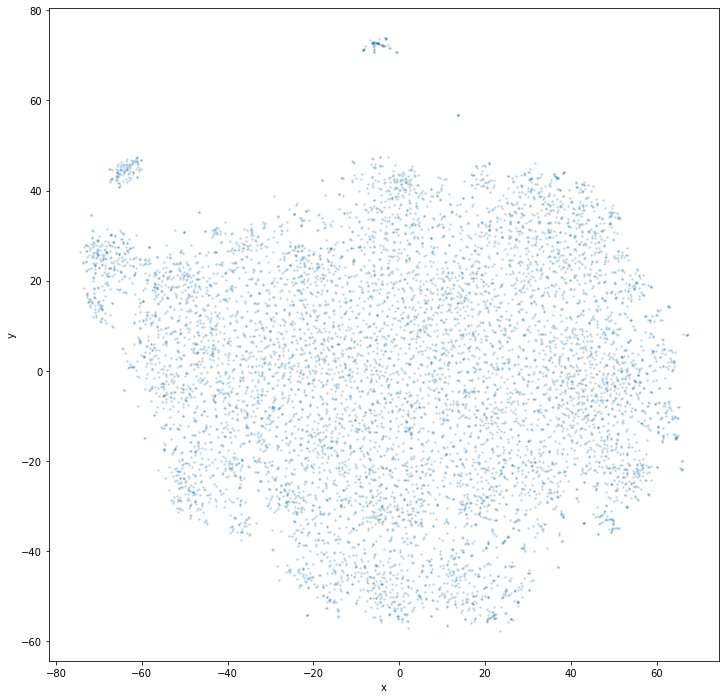

In [140]:
_=cootds_df.plot.scatter('x','y',figsize=(12,12),marker='.',s=10,alpha=0.2)

In [141]:
output_notebook()
subset_df = cootds_df.sample(n=500)
p=figure(plot_width=800,plot_height=800)
_=p.text(x=subset_df.x,y=subset_df.y,text=subset_df.token)
show(p)